# A Medical History of British India

This example is based on the dataset ['A Medical History of British India'](https://data.nls.uk/data/digitised-collections/a-medical-history-of-british-india/) provided by the [Data Foundry](https://data.nls.uk). It uses the "Just the text" version of the dataset (34.7 MB compressed). This dataset is part of the India Papers collection held by the Library.

In [12]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import string

[nltk_data] Downloading package punkt to /home/gustavo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gustavo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from nltk.tokenize import word_tokenize
f = open("../input/nls-text-indiaPapers/74463060.txt", "r")
text = f.read()
text_tokens = word_tokenize(text)

### Let's remove non relevant words

In [3]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### We can improve the stopwords list with our own words

In [4]:
stop_words = stopwords.words('english')
print(len(stop_words))
stop_words = stopwords.words('english') + list(string.punctuation)
print(len(stop_words))
stop_words.extend(['...', ',,'])
print(len(stop_words))

179
211
213


In [5]:
filtered_words = [word for word in text_tokens if word.lower() not in stop_words]
print(filtered_words)

['LEPROSY', 'INDIA', 'REPORT', 'LEPROSY', 'COMMISSION', 'INDIA', '1890-91', 'LEPROSY', 'INDIA', 'REPORT', 'LEPROSY', 'COMMISSION', 'INDIA', '1890-91', 'CALCUTTA', 'PRINTED', 'SUPERINTENDENT', 'GOVERNMENT', 'PRINTING', 'INDIA', '1893', 'CALCUTTA', 'GOVERNMENT', 'INDIA', 'CENTRAL', 'PRINTING', 'OFFICE', '8', 'HASTINGS', 'STREET', 'Memoriam', 'ARTHUR', 'BARCLAY', 'died', 'Simla', 'August', '2nd', '1891', 'deep', 'regret', 'colleagues', 'take', 'opportunity', 'express', 'sense', 'great', 'loss', 'sustained', 'death', 'one', 'Friend', 'Fellow-worker', 'NATIONAL', 'LEPROSY', 'FUND', 'PRESIDENT', 'COMMITTEE', 'H.R.H', 'PRINCE', 'WALES', 'K.G', 'GENERAL', 'COMMITTEE', 'ARCHBISHOP', 'CANTERBURY', 'DUKE', 'NORFOLK', 'K.G', 'DUKE', 'WESTMINSTER', 'K.G', 'DUKE', 'DEVONSHIRE', 'K.G', 'MARQUIS', 'DUFFERIN', 'AVA', 'K.P.', 'G.C.B.', 'G.C', 'M.G', 'EARL', 'ROSEBERY', 'LORD', 'RANDOLPH', 'S.', 'CHURCHILL', 'M.P', 'BARON', 'FERDINAND', 'DE', 'ROTHSCHILD', 'M.P', 'BISHOP', 'LONDON', 'CARDINAL', 'VAUGHAN'

### We can compute the frequency distribution

A frequency distribution records the number of times each outcome of an experiment has occurred. For example, a frequency distribution could be used to record the frequency of each word type in a document.

In [6]:
fdist = FreqDist(filtered_words)
print(fdist)

<FreqDist with 13990 samples and 81957 outcomes>


In [7]:
fdist.most_common(5)

[('1', 1109), ('2', 786), ('leprosy', 608), ('lepers', 498), ('3', 458)]

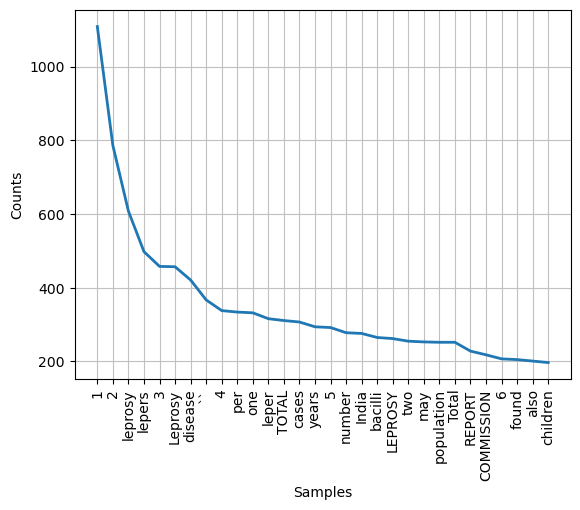

In [8]:
# Frequency Distribution Plot
fdist.plot(30)
plt.show()

### Let's try to identify named entities in the text

We load a pretrained model provided by the library spacy

In [9]:
import spacy
!python -m spacy download en_core_web_sm
 
nlp = spacy.load("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 23.5 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached pydantic_core-2.14.5-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.5 kB)
Using cached pydantic_core-2.14.5-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.1 MB)
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.16.2
    Uninstalling pydantic_core-2.16.2:
      Successfully uninstalled pydantic_core-2.16.2
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


### Now let's see how it works with the 10 first sentences

In [20]:
sentences = sent_tokenize(text)

for s in range(0, 10):
    statement = nlp(sentences[s])
    for ent in statement.ents:
        print(ent.label_ + " " + ent.text)

GPE INDIA
GPE INDIA
DATE 1890-91
GPE INDIA
GPE IN  INDIA
DATE 1890-91
GPE INDIA
DATE 1893
DATE 8
ORG Memoriam ARTHUR BARCLAY
PERSON Simla
DATE August the 2nd, 1891
ORG Friend
GPE Fellow
ORG THE NATIONAL LEPROSY FUND
